# Task Definition
### Why? : This is a simple image classification practice project.
### Of what value?: This is intended to be showcased as one of my noticeable projects.

# Problem Statement
1. What will the input data be?
    * A curated dataset is available.
2. What am I trying to predict (output)?
    * The emotions on people's faces represented as an emoji (image).
3. What type of machine learning task am I facing?
    * Image Classification
4. Are there particular constraints I will need to deal with?
    * Not yet.

# Lets Begin!

In [1]:
# imports
import os
import cv2
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

Backing off send_request(...) for 48.6s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002897E858BE0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


In [2]:
# The Data
emojis_files = "C:/Users/HI/Desktop/.dev/python/Deep learning/Datasets/emojis data"
train_dir = "C:/Users/HI/Desktop/.dev/python/Deep learning/Datasets/facial expression dataset/train/"
test_dir = "C:/Users/HI/Desktop/.dev/python/Deep learning/Datasets/facial expression dataset/test/"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        subset='training',
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        subset='validation',
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')



Found 25841 images belonging to 7 classes.
Found 2868 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# # Data visualization
# plt.figure(figsize=(10, 10))
# for images, _ in train_generator.take(1):
#     for i in range(9): 
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[0].numpy().astype("uint8")) 
#         plt.axis("off")

# row, col = 48, 48
# classes = 7

def count_exp(base, set_):
    dict_ = {}
    for classes in os.listdir(base):
        dir_ = base + classes
        dict_[classes] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


<AxesSubplot:>

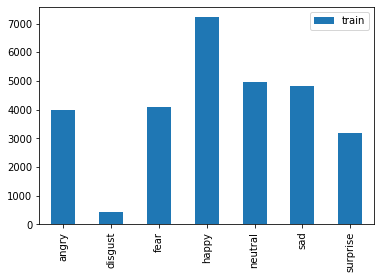

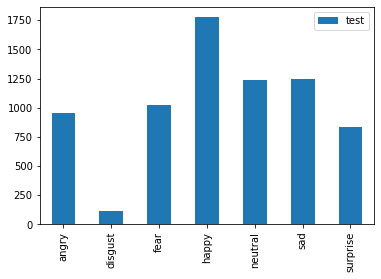

In [5]:
train_count.transpose().plot(kind='bar')
test_count.transpose().plot(kind='bar')

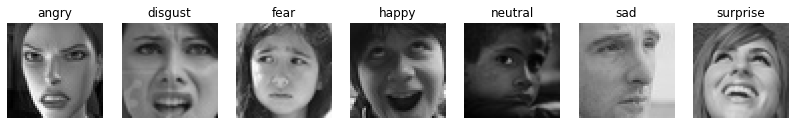

Backing off send_request(...) for 18.8s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002897E858A30>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))
Backing off send_request(...) for 61.4s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002897E858910>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


In [6]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[5]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [49]:
# Model: Functional
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.2),])
inputs = keras.Input(shape=(48, 48, 1)) 
x = data_augmentation(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(7, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

In [50]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 48, 48, 1)]       0         
                                                                 
 sequential_11 (Sequential)  (None, 48, 48, 1)         0         
                                                                 
 conv2d_49 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                      

In [51]:
model.compile(optimizer='rmsprop', loss ='categorical_crossentropy', metrics= ['accuracy'])

In [52]:
# main = os.getcwd()
# logdir = os.path.join(main,"logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [53]:

# tensorboard = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', 
                              mode='min', 
                              verbose=1, 
                              patience=15
                             )
checkpointer = keras.callbacks.ModelCheckpoint(filepath="emotionModel.hdf5",
                               verbose=1, 
                               save_best_only=True
                              )

callbacks = [earlystopping, checkpointer]

In [54]:
model_info = model.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
        callbacks= callbacks)

Epoch 1/100
404/404 [==============================] - ETA: 0s - loss: 1.7906 - accuracy: 0.2575
Epoch 1: val_loss improved from inf to 1.72188, saving model to emotionModel.hdf5
404/404 [==============================] - 32s 74ms/step - loss: 1.7906 - accuracy: 0.2575 - val_loss: 1.7219 - val_accuracy: 0.3033
Epoch 2/100
404/404 [==============================] - ETA: 0s - loss: 1.6987 - accuracy: 0.3132
Epoch 2: val_loss improved from 1.72188 to 1.62457, saving model to emotionModel.hdf5
404/404 [==============================] - 30s 74ms/step - loss: 1.6987 - accuracy: 0.3132 - val_loss: 1.6246 - val_accuracy: 0.3626
Epoch 3/100
404/404 [==============================] - ETA: 0s - loss: 1.6040 - accuracy: 0.3694
Epoch 3: val_loss improved from 1.62457 to 1.52669, saving model to emotionModel.hdf5
404/404 [==============================] - 31s 77ms/step - loss: 1.6040 - accuracy: 0.3694 - val_loss: 1.5267 - val_accuracy: 0.4142
Epoch 4/100
404/404 [==============================] - E

404/404 [==============================] - 33s 82ms/step - loss: 1.2548 - accuracy: 0.5246 - val_loss: 1.1973 - val_accuracy: 0.5523
Epoch 29/100
404/404 [==============================] - ETA: 0s - loss: 1.2673 - accuracy: 0.5218
Epoch 29: val_loss did not improve from 1.19726
404/404 [==============================] - 33s 82ms/step - loss: 1.2673 - accuracy: 0.5218 - val_loss: 1.2614 - val_accuracy: 0.5275
Epoch 30/100
404/404 [==============================] - ETA: 0s - loss: 1.2700 - accuracy: 0.5208
Epoch 30: val_loss did not improve from 1.19726
404/404 [==============================] - 34s 84ms/step - loss: 1.2700 - accuracy: 0.5208 - val_loss: 1.2572 - val_accuracy: 0.5293
Epoch 31/100
404/404 [==============================] - ETA: 0s - loss: 1.2653 - accuracy: 0.5240
Epoch 31: val_loss did not improve from 1.19726
404/404 [==============================] - 33s 81ms/step - loss: 1.2653 - accuracy: 0.5240 - val_loss: 1.2257 - val_accuracy: 0.5443
Epoch 32/100
404/404 [========

In [41]:
model.evaluate(test_generator)

113/113 [==============================] - 4s 32ms/step - loss: 1.2455 - accuracy: 0.5458


[1.2455408573150635, 0.545834481716156]

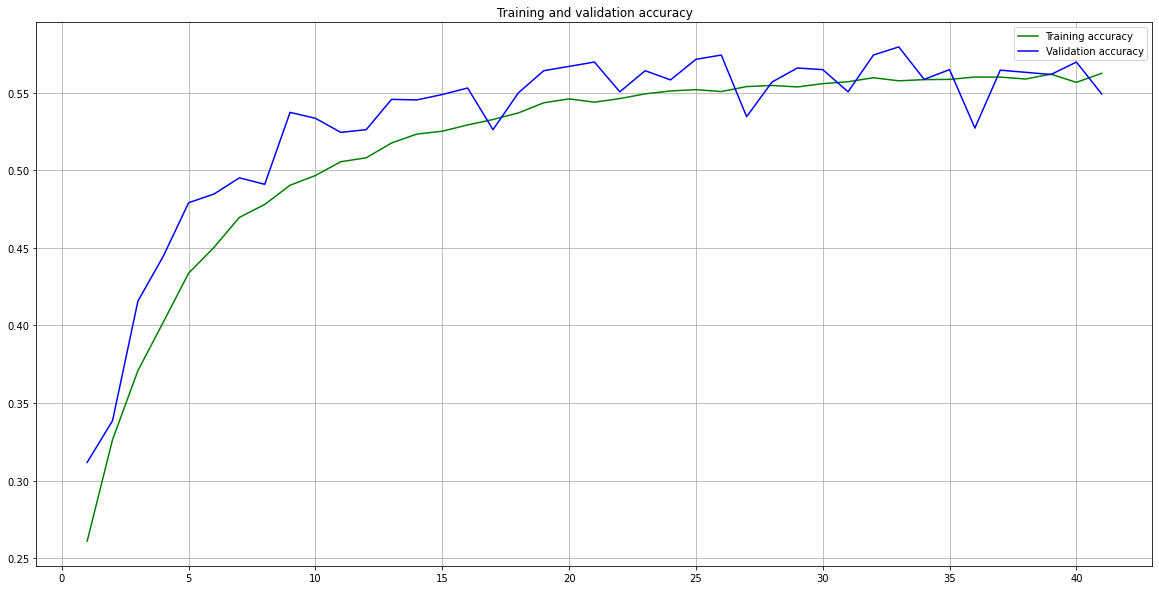

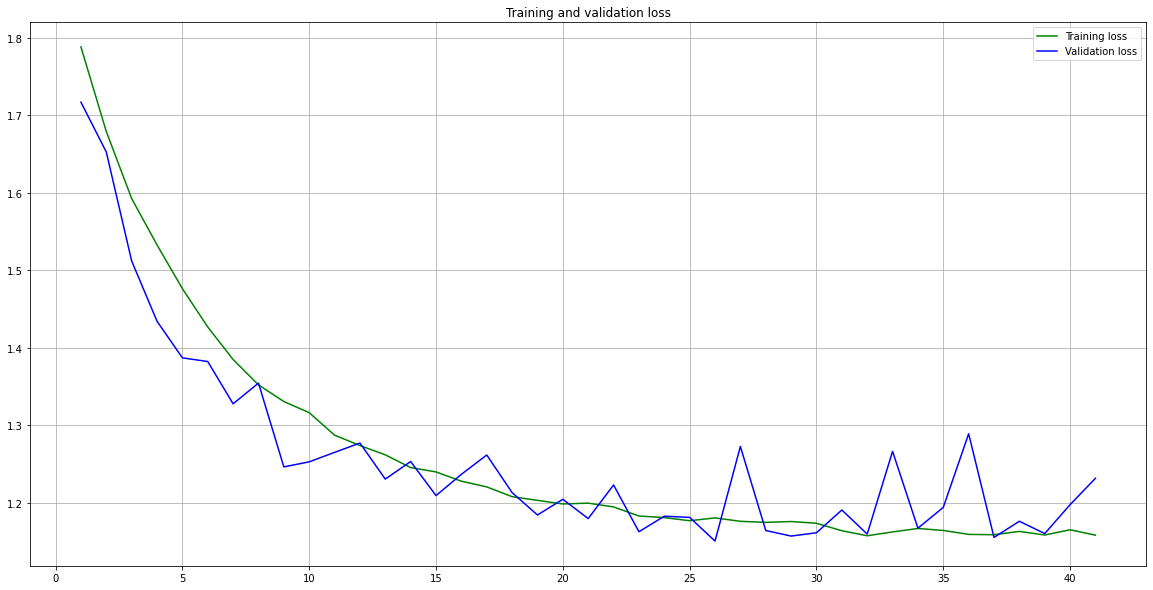

In [42]:
%matplotlib inline
accuracy = model_info.history["accuracy"]
val_accuracy = model_info.history["val_accuracy"]
loss = model_info.history["loss"]
val_loss = model_info.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, accuracy, "g-", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.grid()
plt.legend()

plt.figure(figsize=(20,10))
plt.plot(epochs, loss, "g-", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.grid()
plt.show()

In [33]:
# # saving 
model.save_weights('emotion_model_weights.h5')